In [1]:
# GENERAL LIBRAIRIES IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# OWN LIBRAIRY IMPORT
from basic_sl import synthetise

In [3]:
# DATA IMPORT
netflix = pd.read_csv('../data/Netflix.csv')
netflix.drop('Unnamed: 0', axis = 1, inplace=True)
netflix.head()

,vote,before_90s,90s,2000s,movie,other,tv movie,video movie,Action,Documentary,...,Thriller,Romance,Other_genre,United States,United Kingdom,France,Other_country,English,Other_language,rating_category
0,-1.565669,0.0,1.0,0.0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,top_10pct
1,-1.565669,0.0,1.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,bottom_25pct
2,1.218334,0.0,0.0,1.0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,bottom_25pct
3,0.174333,0.0,1.0,0.0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,bottom_25pct
4,-1.565669,1.0,0.0,0.0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,top_10pct


In [4]:
# SKLEARN IMPORTS
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
# DATA PREPARATION

X = netflix.drop('rating_category', axis = 1)
y = netflix.rating_category

# random_state = 42 for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until al

In [7]:
# DECISION TREE CLASSIFIER
## Naive view: default hyperparameters & all features
### Model fitting
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

DECISION TREE CLASSIFIER
TRAIN dataset
Accuracy score: 88.4%
Recall score (macro): 82.1%
Precision score (macro): 86.8%
ROC_AUC score (macro): 98.0%
TEST dataset
Accuracy score: 66.6%
Recall score (macro): 56.6%
Precision score (macro): 59.2%
ROC_AUC score (macro): 73.4%




/Users/ericmartinet/Documents/GitHub/Project7_SupervisedLearningNetflix/notebook/basic_sl.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


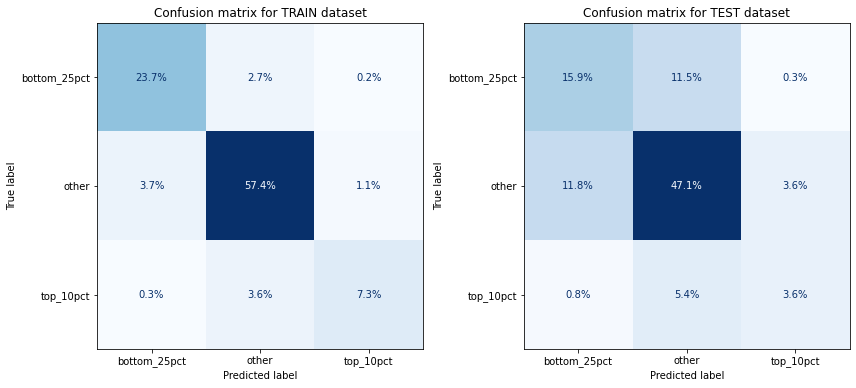

In [8]:
### Synthesis
synthetise(dtc, X_train, X_test, y_train, y_test)

In [9]:
### Conclusions
#### Significant overfit. Let's tune hyperparameters.

In [10]:
## Hyperparameter tuning (max_depth)
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0),
                           {
                              'max_depth':np.arange(1,5+1,1)
                            
                            },cv=5, scoring="accuracy",n_jobs=-1
                           )
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 5}

DECISION TREE CLASSIFIER
TRAIN dataset
Accuracy score: 67.9%
Recall score (macro): 53.1%
Precision score (macro): 63.4%
ROC_AUC score (macro): 77.3%
TEST dataset
Accuracy score: 67.7%
Recall score (macro): 50.6%
Precision score (macro): 60.9%
ROC_AUC score (macro): 74.6%




/Users/ericmartinet/Documents/GitHub/Project7_SupervisedLearningNetflix/notebook/basic_sl.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


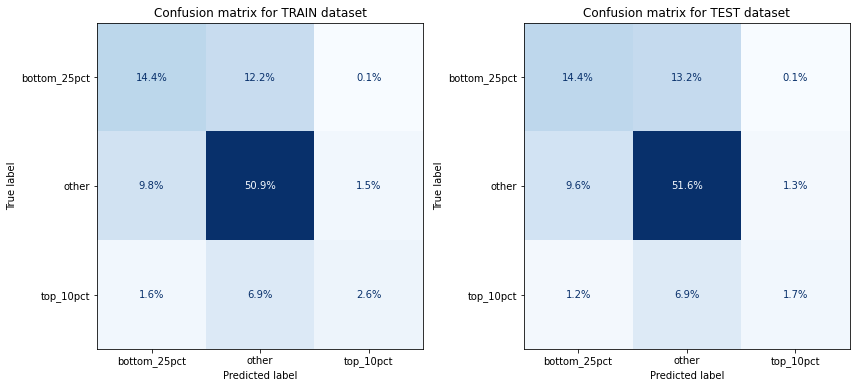

In [11]:
### Use best parameters
dtc_tuned = DecisionTreeClassifier(max_depth = 5, random_state=42)
dtc_tuned.fit(X_train,y_train)
synthetise(dtc_tuned, X_train, X_test, y_train, y_test)

In [12]:
### No more overfit!
### Accuracy remains good at almost 70%, and sensitivity / recall and precision are OK.
### Model works well enough, we can use it.

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_44815/1852151833.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


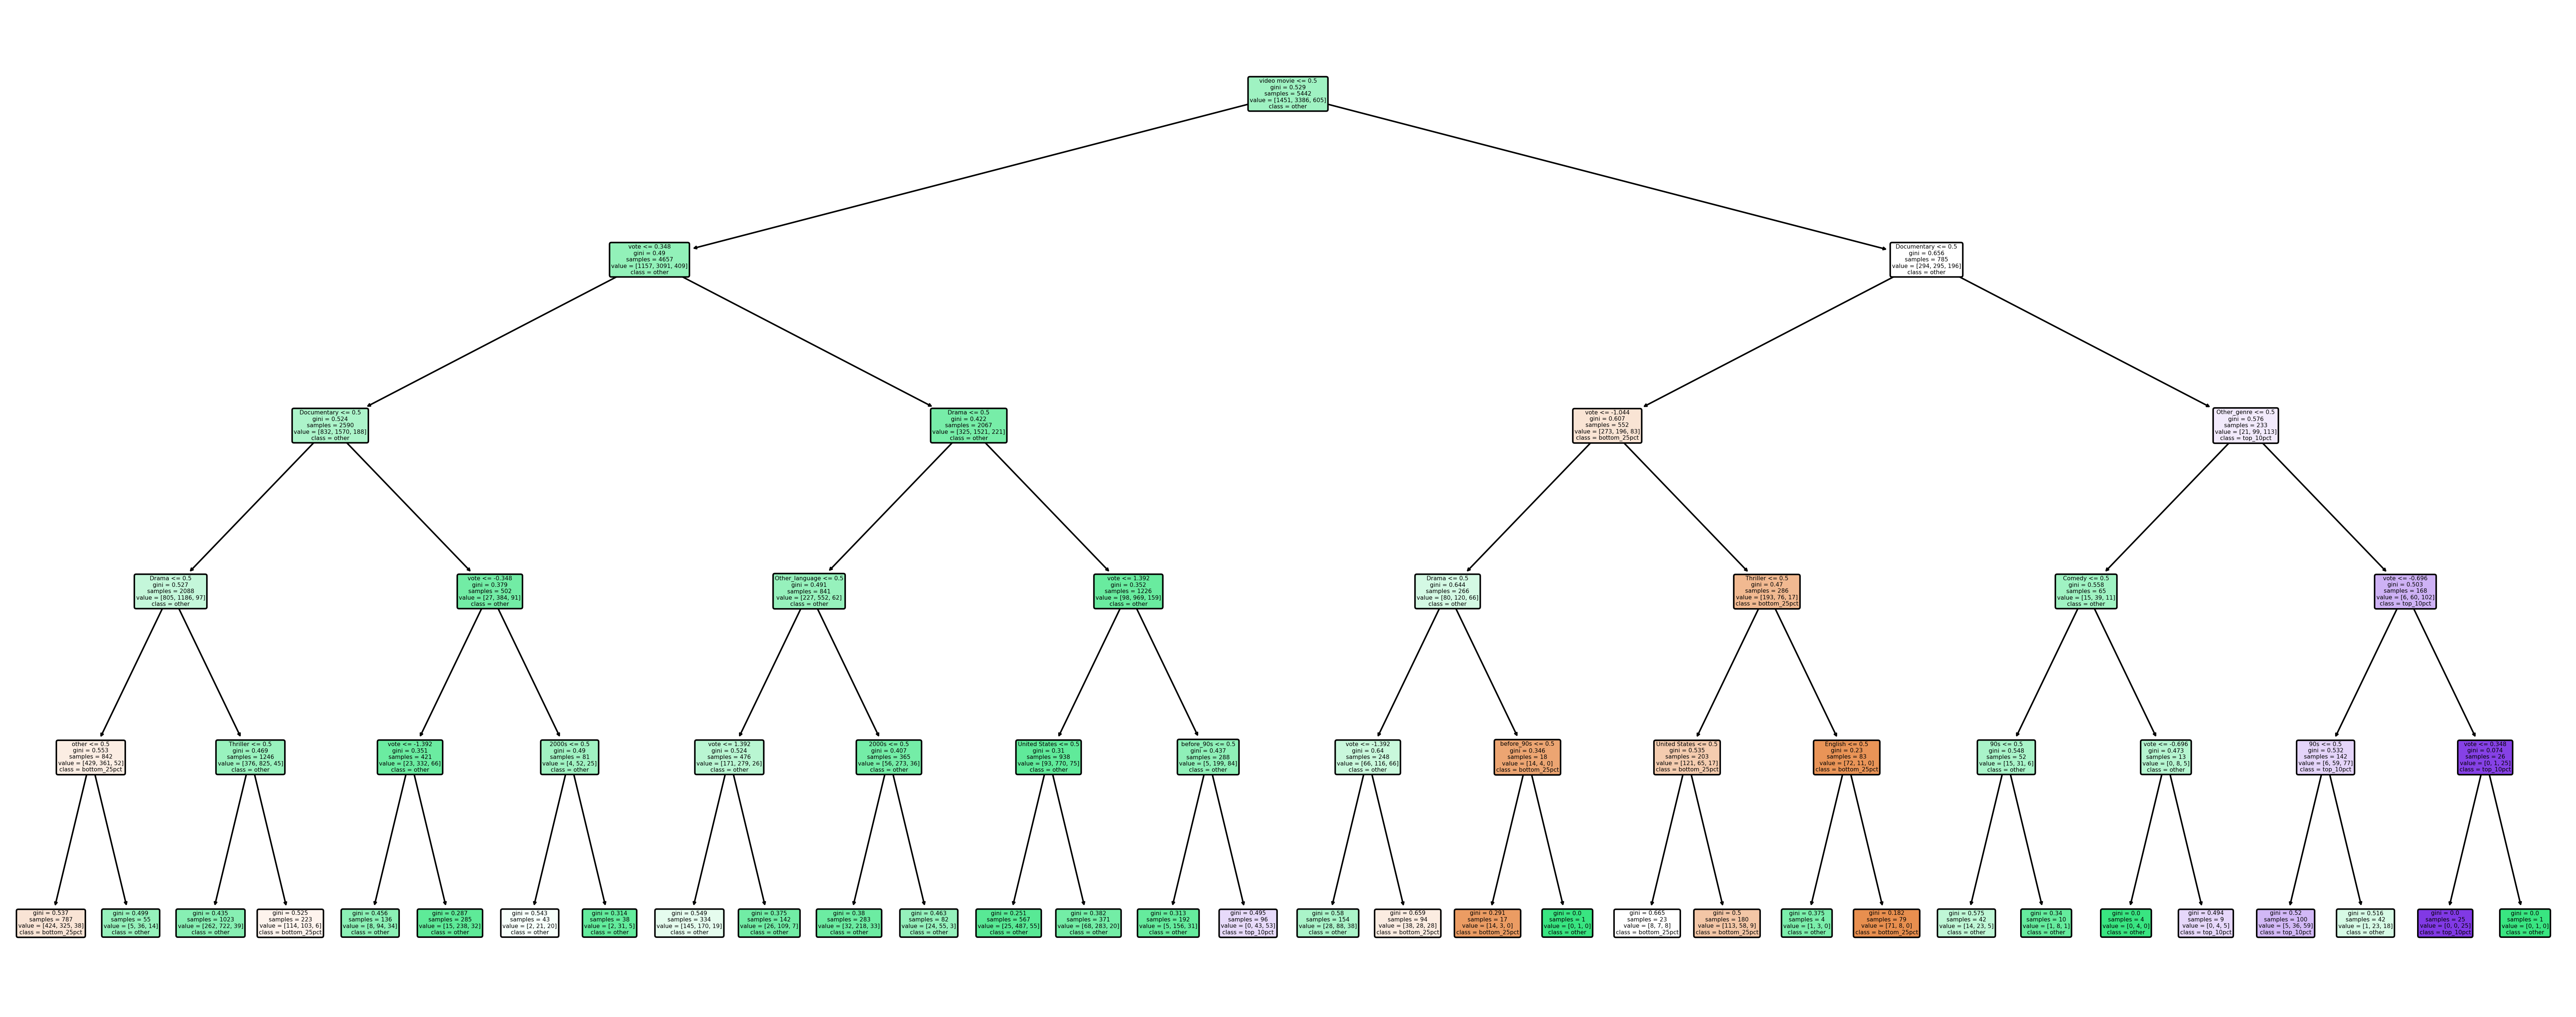

In [13]:
### Display model and save image.
fn = X_train.columns
cn = ['bottom_25pct', 'other', 'top_10pct']

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (30,12), dpi=300)
plot_tree(dtc_tuned,feature_names = fn, class_names = cn, rounded = True, filled = True, ax = ax)
fig.savefig('dtc_tuned.png')
fig.show()